# NVT

:::{admonition} What you need to know

- **In NVT, ensemble** each microstates of the system has different energies because the system can exchange energy with an environment to maintain $T=const$.
- **The Boltzmann distribution** gives the probability of being in any particular macro or microstate in the NVT ensemble. Probability depends exponentially on energy, which shows that the system pays an exponentially high penalty for borrowing power from the environment to occupy excited states. As temperature increases, the price of more excited states is populated.
- **Free energy captures** the entropy-energy tradeoff, which shows which macrostates are more likely to occur at any given temperature! 
- **Legendre transform** $F = U-TS$ makes free energy the central object in thermodynamics of systems under $T=const$.   $\Delta F \leq 0$ replaces $\Delta S \geq 0$ as the condition for spontaneous process of the system.
- **The partition function** $Z$ in the NVT ensemble is a Boltzman-weighted sum over microstates.
- **Bridge equations in NVE and NVT.** While in NVE entropy was linked directly with partition function $S=k_B log \Omega$, in NVT, it is free energy that is directly linked with partition function Z, $F=-k_BT logZ$
- **The Laplace transform** connections partition functions of NVT and NVE $Z$ and $\Omega$. This shows **ensemble equivalence**, e.g., thermodynamics quantities computed in either ensemble are the same!
:::

:::{admonition}  **An intuitive derivation of Boltzmann distribution**
:class: tip, dropdown

**Probability of macrostates**

- Consider a system in contact with the thermal reservoir. The combined system is isolated, which means we can write down the NVE partition function as a sum over different ways of partitioning total energy between the system and the reservoir. 

$$\Omega_{t}(E_t) = \sum_E \Omega(E) \Omega_r(E-E) \cdot$$

- The probability of being in any thermodynamic **macrostate**  described by energy $E$ will be given by the ratio of one term over all possible partitionings of energy:

$$p(E) = \frac{\Omega(E) \Omega_r(E_t-E) }{\sum_E \Omega(E) \Omega_r(E_t-E) }$$

**Reservoir is much larger than the system**

- We can take advantage of the fact that the system $E_t \sim E_r \ll E$ is small compared to the reservoir. We can expand entropy in the exponent of partition function $\Omega_r = e^{S_r/k_B}$ which is a smoothly varying function of energy:

$$S_r(E_t-E)  \approx S_r(E_t)- \Big(\frac{\partial S_r}{\partial E}\Big) E =  S_r(E_t)- \frac{1}{T} E$$

- The constant reservoir term  ends up canceling out from the ratio!

$$p(E) = \frac{ \Omega(E)  e^{\frac{1}{k_B}S(E_t)} e^{-\beta E} }{\sum_E \Omega(E) e^{\frac{1}{k_B}S(E_t)}  e^{-\beta E}} = \frac{ \Omega(E)  e^{-\beta E} }{\sum_E \Omega(E)  e^{-\beta E}}$$

- We can also write down the probability of a single specific microstate $E=E_i$ for which $\Omega(E_i)=1$

$$p_i = \frac{ e^{-\beta E_i} }{\sum_i e^{-\beta E_i}}$$

**Connection with Thermodynamics**

- Let us now connect the entropy of the whole system to entropy in thermodynamics. Recall that in thermodynamics, entropy is an extensive quantity, meaning that total entropy should be expressed as the sum of entropies of system+reservoir. This is possible only if the sum of the $\Omega_t(E_t)$ expression is sharply dominated by a single term that is centered on some (average) value of energy $U$

$$S_t(E_t) = k_B log \sum_E \Omega(E) \Omega_r(E_t-E) \approx k_B log \Omega(U)+k_B log \Omega_r(E_t-U) = S(U) + S_r(E_t-U)$$

$$Z = \sum_E \Omega(E) e^{-\beta E} \approx \Omega (U) e^{-\beta U} = e^{-\beta(U-TS)} = e^{-\beta F}$$

- We see that the reservoir's contribution to the distribution of energy in the system is only through temperature!

- We could also carry our similar derivation by expanding reservoir entropy around the average energy of the system  $U = \sum_i p_i E_i$ by making use of the central limit theorem, which predicts small fluctuations around averages $U - E_i = \delta E_i \sim O(N^{1/2})$
  
:::

:::{admonition} **MaxEnt Derivation of the Boltzmann Distribution**
:class: tip, dropdown

Utilizing the principle of maximum entropy (MaxEnt) with an internal energy constraint unveils an exponential relationship with **microstate energies** \(E_i\), manifesting as the Boltzmann distribution.

The Lagrangian is defined as:

$$ L = -k_B \sum_{i} p_i \log p_i - \alpha \left( \sum_{i} p_i - 1 \right) - \beta \left( \sum_{i} p_i E_i - U \right)$$

Taking the derivative of $L$ with respect to $p_j$ and setting it to zero yields:

$$\frac{\partial L}{\partial p_j} = -k_B (\log p_j + 1) - \alpha - \beta E_j = 0$$

- This equation reveals that the microstate probability can be represented using two Lagrange multipliers. The normalization factor can absorb the first multiplier, leading to:

$$p_j = e^{-\frac{\alpha}{k_B} - 1} e^{-\frac{\beta E_j}{k_B}} \sim e^{-\beta E_j}$$

- Normalization ($\sum_j p_j = 1$) allows us to eliminate the Lagrange multiplier $\alpha$, resulting in the exponential Boltzmann distribution.

**Boltzmann Distribution:**

$$ p_j = \frac{e^{-\frac{\beta E_j}{k_B}}}{Z} $$

- The macrostate probability distribution with energy $E$ and degeneracy $\Omega(E)$ sums the probabilities of corresponding microstates:

$$p(E) = \frac{\Omega (E) e^{-\beta E}}{\sum_E \Omega (E) e^{-\beta E}}$$

**Determining $\beta = \frac{1}{k_B T}$:**

- Inserting the Boltzmann distribution into the entropy equation, we find:

$$S = -k_B \sum_i p_i \log \frac{e^{-\beta E_i}}{Z} = k_B \beta \sum_i p_i E_i + k_B \log Z \sum_i p_i = k_B \beta U + k_B \log Z$$

- Comparing the statistical mechanics expression for entropy change at constant temperature to the Gibbs relation from thermodynamics:

$$dS = k_B \beta dU + k_B d \log Z$$

$$dS = \frac{dU}{T} - \frac{dF}{T}$$

- From these relations, we deduce that:

$$\beta = \frac{1}{k_B T}$$ 

- And for the Helmholtz free energy $F$:

$$F = -k_B T \log Z$$
:::


### $\beta$ and kT (energy)

- $kT$ (also written as $k_BT$) or its inverse $\beta =(k_BT)^{-1}$ contain a product of the Boltzmann constant $k_B$ and the temperature, T.

$$p_i \sim e^{-E_i/k_BT} = e^{-\beta E_i}$$
  
- This product is used as a scale factor for energy values in molecular-scale systems (sometimes it is used as a unit of energy), as the rates and frequencies of many processes and phenomena depend not on their energy alone but on the ratio of that energy and kT.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, N_A

T = 300
print('kT in J:', k*T) 

RT=N_A*k*300 *1e-3
print('RT in kJ/mol:', RT) 

#Compare to the energy of breaking oxygen bond 
E_breakO = 495 # kj/mol

print('Multiples of thermal energy to break oxygen molecule:', E_breakO/RT)

kT in J: 4.141947e-21
RT in kJ/mol: 2.494338785445972
Multiples of thermal energy to break oxygen molecule: 198.44938582049795


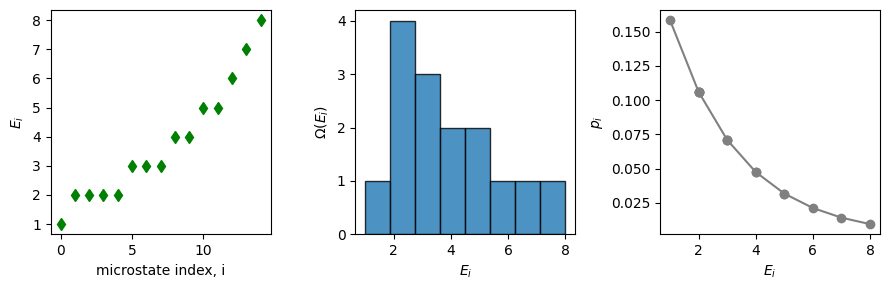

In [89]:
E = np.array([1, 2,2,2,2, 3,3,3, 4,4, 5,5, 6, 7, 8])
T = 300

RT=N_A*k*T *1e-3

fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(9,3))



ax1.plot(E, 'd', color='green')
ax1.set_ylabel(r'$E_i$')
ax1.set_xlabel('microstate index, i')

ax2.hist(E, bins=8, edgecolor='black', alpha=0.8)
ax2.set_ylabel(r'$\Omega(E_i)$')
ax2.set_xlabel(r'$E_i$')

p_i = np.exp(-E/RT)/np.sum(np.exp(-E/RT))
ax3.plot(E, p_i, '-o', label=f'RT={RT}', color='grey')
ax3.set_xlabel(r'$E_i$')
ax3.set_ylabel(r'$p_i$')



fig.tight_layout()

### Micro vs macro states

**Microstates**

- In NVT ensemble microstates follow Boltzmann distribution
- 
$$p_1 = \frac{e^{-\beta E_1}}{Z} = \frac{e^{-\beta E_1}}{e^{-\beta F}}$$

- The relative population of microstates is dictated by the ratio of Boltzmann weights which depends on energy difference $\Delta E$

$$\boxed{\frac{p_2}{p_1} = e^{-\beta (E_2-E_1)}}$$

**Macrostates**

- Probability of macrostates with energy $E_A$ is obtained by summing over all microstates with energy E_A or simply by multiplying by $\Omega_A$. The latter is related to entropy, which ends up turning the numerator into the free energy of a macrostate $A$: $F_A = E_A-TS_A$ 
  
$$p_A =\frac{\Omega (E_A) e^{-\beta E_A}}{Z_A} = \frac{e^{-\beta F_A}}{e^{-\beta F}}$$

- The relative population of macrostates is dictated by the ratio of entropic term times Boltzmann weights which depends on free energy difference $\Delta F$

$$\boxed{\frac{p_B}{p_A} = e^{-\beta (F_B-F_A)}}$$

In [80]:
E = np.array([1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 7, 8]) 

# Compute probability to be in microstate 1 vs 2 at temperatures from kBT = 0.1 to 10

# Compute probability to be in state E=2 vs in state E=1 at different temperatures from kBT = 0.1 to 10

#### Thermodynamic limit and partition functions

**Partition functions**
- Recall that we counted microstates with equal weights $\Omega$ in NVE. In other words, states were equipartitioned.
- In NVT, states are weighted by exponential factors. In other words, low-energy states contribute more than high-energy states. The situation is more severe at low temperatures where only ground states contribute to thermodynamics.

$$\Omega = \sum_i w_i = \sum_i 1$$

$$Z(\beta) = \sum_i w_i = \sum_i e^{-\beta E_i}$$

**Sum over microstates or macrostates**
- Partition function Z can be written down as a sum of microstates or macrostates. Since Energies of macrosystems vary smoothly we can also replace the sum as integral over energies

$$Z(\beta, N, V) = \sum_i e^{-\beta E_i}= \sum_E \Omega (E) e^{-\beta E} = \int \Omega(E) e^{-\beta E}dE$$

- $\Omega(E)\sim e^N$ rapidly increasing function with N because of limit theorems: e.g., the large deviation, central limit theorem, law of large numbers. 

- $e^{-\beta E}\sim e^{-N}$ rapidly decreasing function with N

**Connection with Free energy**
- In the thermodynamic limit of a large number of particles and volumes, only the region of energy survives that guarantees a non-negligible contribution to the partition function

$${Z(\beta) = \int \Omega(E) e^{-\beta E}dE = \int e^{-\beta (E-T S(E))}dE }$$

$${Z(\beta) = \int e^{-\beta (E-TS)}dE \approx e^{min_E [-\beta(E-TS)]} = e^{-\beta(U-TS)} = e^{-\beta F}}$$

- Where $U =\langle E \rangle$ is the thermodynamic average energy, fluctuations around which are on the order of $O(N^{1/2})$

- It can be seen that $Z$, the partition function of NVT is **Laplace Transform** of the density of states of NVE.
- The connection between energy and free energy $F= U -TS$ is via **Legendre Transform** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=10
kbT = 1

E = np.linspace(1, 10*N, 100)
omega  = E**(N)
boltzf = np.exp(-E/kbT)

fig,ax = plt.subplots(nrows=3,sharex=True, figsize=(2, 4))
ax[0].plot(E, omega)
ax[0].set_ylabel('$\Omega(E)$')
ax[1].plot(E, boltzf)
ax[1].set_ylabel('$exp(-E/k_B T)$')
ax[2].plot(E, omega*boltzf)
ax[2].set_ylabel('$\Omega(E) exp(-E/k_B T)$')
ax[2].set_xlabel('$E$')

### Computing Z via classical mechanics

**Integrals over phase space**

- In quantum mechanics counting microsites is easy, we have discrete energies and  could simply sum over microstates to compute partition functions $Z=\sum_i e^{-\beta E_i}$
- Counting microstates in classical mechanics is done by discretizing phase space $\Gamma = (x^{3N}, p^{3N})$ into small cubes of units $dx^Ndp^N\sim h^N$. In other words, we replace summation over quantum states with integral over phase space $\sum_i \rightarrow \int \frac{dpdx}{h}$

- Recall that we need to correct classical mechanics for "double counting" microstates if we have N indistinguishable "particles" with a factor of $N!$  

$$\Omega(E) = \frac{1}{N! h^{3N}} \int_{\Gamma}  \delta \big( H(\Gamma)-E) d \Gamma$$

$$Z(\beta) = \int_{E} \Omega(E) e^{-\beta E} dE  = \frac{1}{N! h^{3N}} \int_{\Gamma} \Bigg[\int_{E} d \Gamma \delta \big( H(\Gamma)-E) e^{-\beta E}dE \Bigg] d\Gamma$$

- We thus obtain an expression of partition function expressed as integral over phase-space. This expression will be useful for computing partition functions of atomic and molecular gasses with simple Hamiltonian functions.
-  
$$\boxed{Z(\beta) = \frac{1}{N! h^{3N}} \int_{\Gamma} e^{-\beta H(\Gamma)} d\Gamma}$$

### Fluctuation-response theorem and ensemble equivalence 

:::{admonition}  **Deriving average and fluctuation expression for energy**
:class: tip, dropdown

**Average Energy**

- Having determined probability distribution over microstates, we can calculate the mean value of energy, which corresponds to the energy in thermodynamics. 

$$ \langle E \rangle = \sum_{i} P_i E_i $$

- where $P_i = \frac{e^{-\beta E_i}}{Z}$ is the probability of the system being in state $i$. Plugging the expression of $P_i$ we get

$$ \langle E \rangle = \sum_{i} \frac{e^{-\beta E_i}}{Z} E_i = \frac{1}{Z} \sum_{i} E_i e^{-\beta E_i} = \frac{1}{Z} \frac{\partial}{\partial (-\beta)} \sum_{i} e^{-\beta E_i} =\frac{1}{Z} \frac{\partial}{\partial (-\beta)} Z =   - \frac{\partial log Z}{\partial \beta}$$

- We thus find that $ \langle E \rangle$ can be obtained by taking the derivative of $-\log Z$ with respect to $\beta$:

**Heat Capacity**

- The heat capacity at constant volume $C_V$ is defined as the derivative of the average energy with respect to temperature:

$$ C_V = \left( \frac{\partial \langle E \rangle}{\partial T} \right)_V $$

- Using the chain rule, $C_V$ can be expressed as:

$$ C_V = \frac{\partial \langle E \rangle}{\partial \beta} \frac{\partial \beta}{\partial T} $$

- Since $\beta = \frac{1}{k_B T}$, we have $\frac{\partial \beta}{\partial T} = -\frac{1}{k_B T^2}$. taking the derivative of $\langle E \rangle$ with respect to $\beta$ gives:

$$ \frac{\partial \langle E \rangle}{\partial \beta} = \frac{\partial}{\partial \beta} \left( -\frac{1}{Z} \frac{\partial Z}{\partial \beta} \right) $$

- Simplifying this derivative and substituting $\frac{\partial \beta}{\partial T}$ yields the heat capacity:

$$ C_V = -k_B \beta^2 \frac{\partial^2 \ln Z}{\partial \beta^2} $$

:::

- Mean and fluctuation of energy are computed from partition function as first and second derivatives (see derivation above)

$$\langle E \rangle = -\frac{\partial log Z}{\partial (\beta)}$$

- The relationship between fluctuations and heat capacity is known as **fluctuation-response theorem** in statistical mechanics

$$\sigma^2_E = \frac{\partial^2 log Z}{\partial \beta^2}  = k_BT^2 C_v$$

- The fluctuations in energy are small relative to the mean. This shows that thermodynamic quantities computed in NVE and NVT should not differ in the thermodynamic limit of large systems! Thus, we are free to choose any convenient ensemble if we want to calculate, let's say, temperature dependence on entropy.
  
$$\frac{\sigma_E}{\langle E\rangle} = \frac{(k_BT^2 C_v)^{1/2}}{\langle E\rangle}\sim O(N^{-1/2})$$

## The power and utility of NVT: The non-interacting system

- For the independent particle system, the energy of each particle enter the total energy of the system additively.  

$$E(\epsilon_1, \epsilon_2, ... \epsilon_N) = \epsilon_1+\epsilon_2+...\epsilon_N$$

- The exponential factor in the partition function allows decoupling particle contributions $e^{-\beta{(\epsilon_1+\epsilon_2)}} = e^{-\beta{\epsilon_1}}e^{-\beta{\epsilon_2}}$. This means that the partition function can be written as the product of the partition functions of individual particles!

$$Z = \sum^{n=N}_{n=0} e^{-\beta E_n} =  \Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)...\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)= z_1 \cdot z_2 \cdot z_3 ... z_N$$


**Distinguishable states**:

$$Z = z_1 \cdot z_2 \cdot z_3 ... z_N$$

**Indistinguishable states**:

$$ Z = \frac{1}{N!}z^N $$

:::{admonition} **General strategy for using NVT for simple non-interacting systems**
:class: tip

1. Compute the **single particle partition function** $z= e^{-\beta \epsilon_1}+  e^{-\beta \epsilon_2}+ ...$

2. To compute **full partition function**, raise z to the power of N and apply factorial in case of indistinguishable particles  $Z = \frac{1}{N!}z$ or take product in case of distinguishable identical particles $z^N$

3. Compute the **free energy** $F= - k_B T log Z$

4. Take **derivatives of free energy** to get the thermodynamic quantities. E.g one is often interested in computing temperature dependence of $\mu(T), U(T), S(T)$
:::

### Example-1: A two-state model in NVE vs NVT ensemble

- **NVE**
Let us consider a simple two-level system where lower level $\epsilon_0 = 0$ and upper level $\epsilon_1 =\epsilon$. We will now use $NVE$ ensemble to obtain thermodynamic quantities $(S, T, C_v)$ and then obtain the same quantities with $NVT$.

$$E = n\epsilon$$

$$\Omega(E) = \frac{N!}{(N-n)! n!}$$

$$S = k_B log \Omega(E) = N k_B \Big [- \frac{n}{N}log \frac{n}{N} - \frac{N-n}{N}log \frac{N-n}{N} \Big]$$

$$\frac{1}{T} = \frac{\partial S(E)}{\partial E} =  \frac{k_B}{\epsilon}\frac{\partial log\Omega(n)}{\partial  n} = \frac{k_B}{\epsilon}log \frac{N-n}{N}$$

$$\frac{n}{N} = \frac{1}{1+e^{\beta \epsilon}}$$

$$E = n\epsilon = \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

- **NVT** Solving a two-state system in an NVT ensemble is much easier because the partition function decouples into single particle contributions. 

$$Z = \sum^{n=N}_{n=0} e^{-\beta E_n}  = (1+e^{-\beta \epsilon})^N$$

$$F= -k_B T log Z = -k_BT N log(1+e^{-\beta \epsilon})$$


$$\langle E \rangle  = \frac{\partial log Z}{\partial (-\beta)} =  \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

In [7]:
from ipywidgets import interact

@interact(eps=(0.5,10, 0.5))
def E_two_sys(eps=1):
    
    N       = 1
    kbT     =  np.linspace(0,5,1000)/eps
    E_eps   = N/(1+np.exp(1/kbT))
    
    plt.plot(kbT, E_eps, lw=3)
    plt.xlabel('$k_B T/\epsilon$')
    plt.ylabel('$E/\epsilon$')
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='eps', max=10.0, min=0.5, step=0.5), Output()), _dom_…

### Example-2: Ideal gas (classical)

$$H(p^N, x^N) = K(p^N)  = \sum^{i=N}_{i=1}\frac{p^2_i}{2m}$$

$$\boxed{Z(\beta) = \frac{1}{h^{N} N!} \int dp^N dx^N e^{-\beta H(p^N,x^N)}}$$

**Partition function for a single atom**

- Let us evaluate the partition function for a single particle in 3D:

$$Z(\beta) =  \Bigg [\frac{1}{h} \int_{L} dx \int^{+\infty}_{-\infty} dp e^{-\beta \frac{p^2}{2m}}  \Bigg ]^3 = V \Big [ \frac{2\pi m}{h \beta} \Big]^{3/2} = V n_Q$$

**On the validity of classical approximation**

- We wrote down the partition sum in terms of the volume of the container and a quantum density $n_Q$ 

- As long as interatomic distances are larger than De-Broglie thermal wavelength, classical approximation is good

$$n_Q = \Big [ \frac{m k_B T}{2 \hbar^2} \Big]^{3/2} = \frac{1}{\lambda^3_T}$$
$$\lambda_T = \frac{h}{2mk_BT} \sim \frac{h}{m \bar{v}}$$

**Partition function for N atoms**

$$Z = \frac{Z^N}{N!}  = \frac{(V n_Q)^N}{N!}$$

- Using the curdest version of Striling's approximation $N!\approx N^N e^{-N}$ and denoting $n = N/V$ as the density we get

$$Z = \Big[ \frac{n_Q}{n}\Big]^N e^N$$

$$F = -k_B T log Z = -N k_B T  log \Big( \frac{n_Q}{n} \Big) - Nk_BT$$

- We can also calculate entropy and other thermodynamic quantities and compare with expressions obtained in NVE

$$S = -\Big( \frac{\partial F}{\partial T}\Big)_{N,V} = Nk_B log \Big( \frac{n_Q}{n} \Big) + Nk_B + \frac{3}{2}Nk_B$$


**Entropy**
$$S = Nk_B \Bigg[log \Big( \frac{n_Q}{n} \Big)+ \frac{5}{2} \Bigg]$$

**Mean energy**

$$U = \frac{\partial log Z}{\partial (-\beta)} = \frac{3}{2}N k_B T$$

**Pressure and ideal gas law**
$$p = -\frac{\partial F}{\partial V} =\frac{N k_B T}{V}$$

**Chemical potential**

$$\mu = k_B T \cdot log  \Big(\frac{n}{n_Q(T)}\Big)$$

### Example-3 Ideal paramagnet of spin 1/2

Consider N independent spins in magnetic field $B$. Each $s_j = \pm 1$ spin variable can assume two values that we refer to as up and down.
 
$$E  = -\mu B \sum^{N}_j s_j $$

**Partition function of a single spin**

$$Z_1 = \sum_{s_1} e^{\beta \mu B s_1} = e^{\beta \mu B} + e^{-\beta \mu B}  = 2 cosh(\beta \mu B)$$

**Partition function of N spins**

$$Z =Z_1^N$$

**Free energy** 

$$ F(T, B) = - \beta^{-1} log Z = - N \beta^{-1} log \Big [ 2 cosh (\beta \mu B )  \Big ]$$

**Entropy**

$$S = - \Big(\frac{\partial F}{\partial T} \Big)_B = k_B log \Big [ 2 cosh (\beta \mu H )  \Big ] - k_B (\beta \mu B)\cdot tanh (\beta \mu B)$$

**Magnetization**

Magnetization $M$ (extensive quantity) or magnetization per particle $m=M/N$ (intensive quantity) is given as another free energy derivative:

$$M = - \Big(\frac{\partial F}{\partial B} \Big)_T = \mu tanh \Big(\beta \mu B \Big)$$

**Magnetizatic susceptibility**

In the context of paramagnet, we have another response function in the form of magnetic susceptibility.

$$\chi(T, B) =  \Big(\frac{\partial m}{\partial B} \Big)_T = \mu^2 \beta B cosh^{-2} (\beta \mu B)$$

which leads to a well-known **Curie Law**

$$\chi(T, B=0) = \frac{\mu^2 }{k_B T}$$

Finally, as a consistency check we can combine entropy and free energy expressions to obtain internal energy:

$$U = F+TS = -\mu B tanh(\beta \mu B)$$

Text(0.5, 0, 'B')

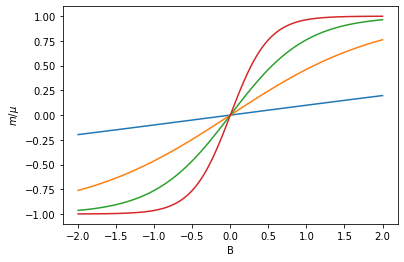

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2, 2, 100)

for beta in [0.1, 0.5, 1, 2]:
    plt.plot(x, np.tanh(beta*x))
    
plt.ylabel('$m/\mu$')    
plt.xlabel('B')

## Non-interacting molecules

### Translational degrees of freedom: particle in a box

$$E_{n_x, n_y, n_z} = \frac{\hbar^2 \pi^2}{2m L^2} \big(n^2_x+n^2_y+n^2_z \big)$$

$$ Z \approx \Bigg [\int^{\infty}_0 dn e^{-\frac{\hbar^2 \pi^2}{2m k_B TL^2}n^2} \Bigg]^{3} = V \Bigg[\frac{m k_B T}{2\pi \hbar^2} \Bigg]^{3/2} =  V n_Q$$

- For $N$ molecules in a box
  
$$Z= \frac{(V n_Q)^N}{N!}$$

### Rotatational degrees of freedom: Rigid rotor model 

$$E = \frac{\hbar^2}{2I} J (J+1) $$

$$Z \approx \int^{J=\infty}_{J=0} (2J+1)e^{-\Big[\beta \frac{\hbar^2}{2I} J (J+1)\Big]}\approx \frac{T}{\theta_{rot}}$$

- Where $\theta_{rot} = \frac{\hbar^2}{2 I_0 k_B}$ is called rotational temperature. 

### Vibrational degrees of freedom: Harmonic oscillator model

$$E_n = \hbar \omega (n+1/2)$$

$$z = \sum^{n=+\infty}_{n=0} = e^{-\frac{1}{2}\beta \hbar \omega} (1 + e^{-\beta\hbar\omega}+e^{-2\beta\hbar\omega}+...) = \frac{e^{-\frac{1}{2}\beta \hbar \omega}}{1-e^{-\beta\hbar\omega}}$$

$$Z = z^N$$

$$E = \frac{\partial log Z}{\partial (-\beta)} = N\hbar \omega \Big(\frac{1}{2}+ \frac{1}{1+e^{\beta\hbar\omega}} \Big) $$

- When $T \rightarrow 0$ we are left with zero point energies $E \rightarrow \frac{N \hbar \omega}{2}$

- When $T \rightarrow \infty$ we get equipartion of energy! $E \rightarrow \frac{3}{2} N k_B T$

### Partition function for a molecular gas


$$E = E_{transl}+E_{vib}+E_{rot}+E_{elec} $$


$$Z = Z_{transl} Z_{vib} Z_{rot} Z_{elec} $$

### Equipartion theorem

Finally, we can also prove a powerful general result showing us that each degree of freedom that appears in Hamiltonian as a quadratic function, e.g., $kx^2$, contributes on average $\frac{1}{2}k_BT$ of energy. Hence we can count degrees of freedom and write down average energy!

$$U(x) = kx^2 $$

$$\langle U \rangle = \int p(x) U(x) dx = \frac{\int kx^2 e^{-\beta kx^2}dx}{\int e^{-\beta kx^2}dx} = \frac{k_B T}{2}$$

- The answer is found quickly by identifying variance $\sigma^2$ in gaussian function with zero mean $e^{\frac{-x^2}{2\sigma^2}}$
- Notice the spring constant does not figure in the average energy expression!

**Example** Calculate heat capacity of diatomic gas.
  

## Problems

### Problem-1 Elementary derivation of Boltzmann's distirbution

Let us do an elementary derivation of Boltzman distribution showing that when a macroscopic system is in equilibrium and coupled to a heat bath at temperatere $T$ we have a universal dependence of probability for finding system at different energies: 

$$\boxed{P(r')/P(r)=e^{-\beta (U(r)-U(r'))}}$$

The essence of the derivation is this. Consider a vertical column of gas somehre in the mountains.
- On one hand we have graviational force which acts on a column between $h, h+dh$ with cross section $A$. 
- On the other hand we have pressure balance which thankfully keeps the molecules from dropping on the ground. 
- This means that we have a steady density of molecules at each distance $n(h)$ for a fixed $T$. Write down this balance of forces (gravitational vs pressure ) and find show how density at $h$, $n(h)$ is related to density at $h=0$, $n(0)$. 

> Tip: you may use $P=nkT$ for pressure and $mgh$ for the gravitational force) 

### Problem-2 Three level system



Consider a system of N classical and non-interacting particles in contact with a thermal reservoir at a temperature $T$. Each particle can have be in three states with energy $0$, $\epsilon$ or $3\epsilon$ where $\epsilon>0$. 

- Obtain an expression for $Z$ then compute the average and fluctuation of energy.

- Plot the heat capacity as a function of temperature $C_v(T)$

- Plot the average enegy as a function of temperature $U(T)$

- Plot the entropy as a function of temperature $S(T)$. 



### Problem-3 Spins on a lattice

Consider $N$ lattice sites which have quantum spins $s=1$ (not to be confused with entropy) with a mangnetic moment $\mu$. Spins are subject to a uniform mangeitc field in z direction $B=B_z$ making the energy of each spin $-\mu B m $ where $m$ is the magnetic quantum number thattakes on three possible values $m=0, \pm 1$. 

- Compute the entropy $S$ and the mangeitzation of the system $M$

- Plot entropy as a function of temperatures and study the limit of low temperatures $S(T\rightarrow 0)$



### Problem-4 2D diploes on a lattice

Consider a 2D square lattice with $M$ lattice points. On each point we have a mangeetic moment that can point in four possible directions: $+x, -x, +y, -y$. Along $y$ axis, the dipole has the energy $\epsilon>0$ and along the x axis $\epsilon=0$.

Dipoles are not interacting with each other and we also ingnore kinetic energy of diplos since they are fixed at lattice positions. 

- Write down parition function for this system $Z$

- Compute the average energy.

- Compute entropy per dipole $s(T)$. Evaluate the difference $S(T=\infty)-S(T=0)$? Can you see a link with number of arrangements of dipols?

- Compute microcanonical partition function $\Omega (N\epsilon)$

- Show that we get the same entropy expression by using $NVE$ and $NVT$ ensembles.

### Problem-5 A typical spin problem 

Due to a ligand field, the degeneracy of d-orbital of chromium ion $Cr^{3+}$ is partially lifted. The spin part of the hamiltonian that lifts this degeneracy has the following form.

$$H =  D \big(S_z^2 -S(S+1)/2 \big)$$

Where $D>0$ is some constant and $S=3/2$ (the cation has an electronic term ${F}^ 4_{3/2}$

- Conceptual question: Why can we apply statisical mechanics to a "single" ion?

- Obtain the occupation probability of each discrete energy level $P(E)$.

- Calculate the entropy and the specific heat then show that heat capacity behaves as $T^{-2}$ at high temperatures.

- Supose heat capacity is $C=k_b \Big(\frac{T}{T_0} \Big)^2$ with $T_0=0.18 K$ at higher temperatures. Determine the energy spacing. 